# Building Ages and Size Analysis

In this notebook, we will take a look at information on building ages and sizes. We will compare and look for any paterns, while looking at other information avaliable in the dataset.

-------------

-----------------

The analysis in the next two sections is based on the PLUTO dataset, which consists of information on buildings in New York City
(https://www1.nyc.gov/site/planning/data-maps/open-data/dwn-pluto-mappluto.page). A disclaimer on that page lets us know that dataset may not be 100% accurate and may have missing data, although it is as accurate as possible.

# NYC

A short analysis of New York City buildings, looking at average age, size, number of floors and number of units. Buildings in NYC are not the central focus of this notebook, but it would be good to have an idea of this information to compare with buildings in the Brownsville area that are of interest. 

In [1]:
#loading up necesary libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
%matplotlib inline

In [2]:
#loading the dataset
pluto = pd.read_csv("pluto_21v2.csv")
pluto

C:\Users\miss_\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3343: DtypeWarning: Columns (19,20,22,24,26,63,64) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,borough,block,lot,cd,ct2010,cb2010,schooldist,council,zipcode,firecomp,...,appbbl,appdate,plutomapid,firm07_flag,pfirm15_flag,version,dcpedited,latitude,longitude,notes
0,BX,4660,34,212.0,380.00,NaN,11.0,12.0,10467.0,E062,...,NaN,NaN,1,NaN,NaN,21v2,NaN,40.877873,-73.863604,NaN
1,MN,445,54,103.0,38.00,4000.0,1.0,2.0,10003.0,E028,...,NaN,NaN,1,NaN,NaN,21v2,NaN,40.725333,-73.988711,NaN
2,MN,467,55,103.0,40.00,2000.0,1.0,2.0,10003.0,L003,...,NaN,NaN,1,NaN,NaN,21v2,NaN,40.731190,-73.987722,NaN
3,BK,2621,7501,301.0,573.00,3003.0,14.0,33.0,11222.0,E238,...,3.026210e+09,1/23/2008,1,NaN,NaN,21v2,NaN,40.726484,-73.951001,NaN
4,MN,1970,58,109.0,213.03,1001.0,5.0,9.0,10027.0,E080,...,NaN,NaN,1,NaN,NaN,21v2,NaN,40.817053,-73.952741,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
858208,SI,5016,55,503.0,132.04,NaN,31.0,51.0,10306.0,E162,...,NaN,NaN,3,NaN,NaN,21v2,NaN,40.557440,-74.137239,NaN
858209,SI,3571,63,502.0,114.02,NaN,31.0,50.0,10306.0,E159,...,NaN,NaN,3,NaN,1.0,21v2,NaN,40.581080,-74.103509,NaN
858210,BK,7690,206,315.0,642.00,NaN,22.0,45.0,11229.0,E276,...,NaN,NaN,3,NaN,NaN,21v2,NaN,40.612185,-73.944649,NaN
858211,MN,2105,450,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,3,1.0,1.0,21v2,NaN,40.828169,-73.933870,NaN


In [3]:
#detecting N/A values
pluto.isna

<bound method DataFrame.isna of        borough  block   lot     cd  ct2010  cb2010  schooldist  council  \
0           BX   4660    34  212.0  380.00     NaN        11.0     12.0   
1           MN    445    54  103.0   38.00  4000.0         1.0      2.0   
2           MN    467    55  103.0   40.00  2000.0         1.0      2.0   
3           BK   2621  7501  301.0  573.00  3003.0        14.0     33.0   
4           MN   1970    58  109.0  213.03  1001.0         5.0      9.0   
...        ...    ...   ...    ...     ...     ...         ...      ...   
858208      SI   5016    55  503.0  132.04     NaN        31.0     51.0   
858209      SI   3571    63  502.0  114.02     NaN        31.0     50.0   
858210      BK   7690   206  315.0  642.00     NaN        22.0     45.0   
858211      MN   2105   450    NaN     NaN     NaN         NaN      NaN   
858212      MN   2156    44  112.0  269.00     NaN         6.0     10.0   

        zipcode firecomp  ...        appbbl    appdate  plutomapid 

In [4]:
#filled N/A values with 0, as removing them entirely affected the datase in a way that left it unusable.
pluto.fillna(value=0, inplace=True)

I filled the NA values (with 0), because dropping them affected the data in a way that made analyzing dificult

-------------

Looking at the building square feet ("bldgarea" column)

In [5]:
pluto["bldgarea"].mean()

6504.289891903292

In [6]:
pluto["bldgarea"].median()

2001.0

In [7]:
pluto["bldgarea"].mode()

0    0.0
dtype: float64

Text(0.5, 0, 'Building Square Feet')

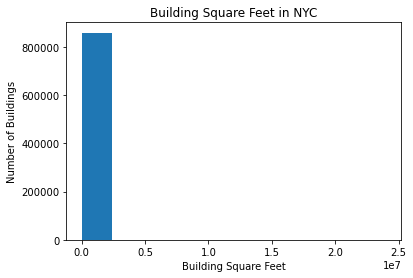

In [79]:
pluto['bldgarea'].plot(kind='hist')
plt.title("Building Square Feet in NYC")
plt.ylabel("Number of Buildings")
plt.xlabel("Building Square Feet")

-----------------

Looking at the year the buildings were built ("yearbuilt" column)

In [9]:
pluto["yearbuilt"].mean()

1846.0182646965263

In [10]:
pluto["yearbuilt"].median()

1930.0

In [11]:
pluto["yearbuilt"].mode()

0    1920.0
dtype: float64

This mean, median and mode of the years of buildings being built is interesting, as a search on Statista reveals that the average building age in NYC is 53 years old (as of 2014). 

Text(0.5, 0, 'Years Built')

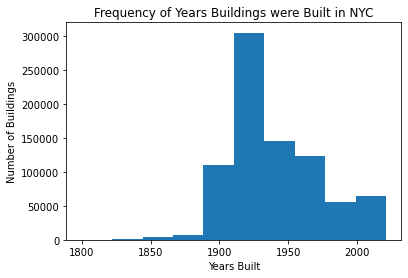

In [66]:
pluto['yearbuilt'].plot(kind='hist',range=(1800,2021), bins=10)
plt.title("Frequency of Years Buildings were Built in NYC")
plt.ylabel("Number of Buildings")
plt.xlabel("Years Built")

---------------------

Looking at numbers of floors in buildings

In [12]:
pluto["numfloors"].mean()

2.3384276164540303

In [13]:
pluto["numfloors"].median()

2.0

In [14]:
pluto["numfloors"].mode()

0    2.0
dtype: float64

Text(0.5, 0, 'Number of Floors in Building')

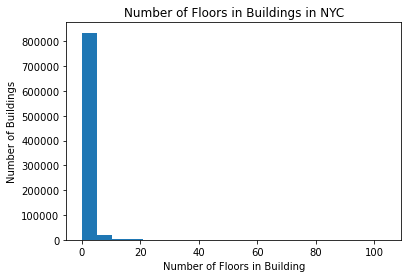

In [81]:
pluto['numfloors'].plot(kind='hist', bins = 20)
plt.title("Number of Floors in Buildings in NYC")
plt.ylabel("Number of Buildings")
plt.xlabel("Number of Floors in Building")

-----------------------

Number of residental units

In [15]:
pluto["unitsres"].mean()

4.188058209325657

In [16]:
pluto["unitsres"].median()

2.0

In [17]:
pluto["unitsres"].mode()

0    1.0
dtype: float64

Text(0.5, 0, 'Number of Residential Units')

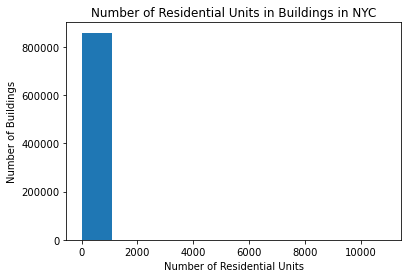

In [77]:
pluto['unitsres'].plot(kind='hist')
plt.title("Number of Residential Units in Buildings in NYC")
plt.ylabel("Number of Buildings")
plt.xlabel("Number of Residential Units")

-----------------------

So our information for NYC buildings is: <br>

Average building area: 2001 sqr feet<br>

Average year buildings were built: 1930<br>

Average number of floors: 2.33 floors<br>

Average number of residential units per building: 4.1 units

--------------------------

-----------------

# Brownsville

In this section, we'll be taking a look at building ages and sizes in the Brownsville area, using the PLUTO dataset.

In [22]:
pluto_bk16 = pd.read_csv("pluto_bk16.csv")
pluto_bk16

C:\Users\miss_\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3343: DtypeWarning: Columns (19,22) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,borough,block,lot,cd,ct2010,cb2010,schooldist,council,zipcode,firecomp,...,appbbl,appdate,plutomapid,firm07_flag,pfirm15_flag,version,dcpedited,latitude,longitude,notes
0,BK,1509,7501,303,379.0,1000.0,16,41,11233,E222,...,3.015090e+09,6/12/1993,1,NaN,NaN,21v2,NaN,40.682184,-73.917910,NaN
1,BK,1510,7501,316,373.0,3001.0,23,41,11233,E233,...,3.015100e+09,6/12/1993,1,NaN,NaN,21v2,t,40.682596,-73.914863,NaN
2,BK,3622,19,316,896.0,2003.0,23,42,11212,E257,...,3.036220e+09,9/20/2004,1,NaN,NaN,21v2,NaN,40.656548,-73.911000,NaN
3,BK,3621,49,316,896.0,2002.0,23,42,11212,E257,...,NaN,NaN,1,NaN,NaN,21v2,NaN,40.656466,-73.911537,NaN
4,BK,3557,8,316,898.0,1000.0,23,41,11212,L120,...,NaN,NaN,1,NaN,NaN,21v2,NaN,40.664122,-73.912947,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14578,BK,4717,2,317,890.0,NaN,18,42,11212,E257,...,NaN,NaN,1,NaN,NaN,21v2,NaN,40.654439,-73.913111,NaN
14579,BK,4717,17,317,890.0,5000.0,18,42,11212,E257,...,NaN,NaN,1,NaN,NaN,21v2,NaN,40.654763,-73.914034,NaN
14580,BK,3565,1,316,892.0,NaN,23,41,11212,E283,...,NaN,NaN,1,NaN,NaN,21v2,t,40.661316,-73.918585,NaN
14581,BK,3520,82,316,924.0,NaN,23,41,11212,L120,...,NaN,NaN,3,NaN,NaN,21v2,NaN,40.667114,-73.911906,NaN


In [23]:
pluto_bk16.fillna(value=0, inplace=True)

--------------------

Building area

In [24]:
pluto_bk16["bldgarea"].mean()

5181.590070630185

In [25]:
pluto_bk16["bldgarea"].median()

2564.0

In [26]:
pluto_bk16["bldgarea"].mode()

0    0.0
dtype: float64

Text(0.5, 0, 'Building Square Feet')

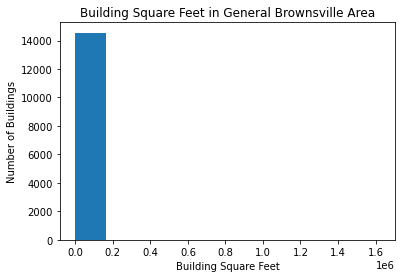

In [80]:
pluto_bk16['bldgarea'].plot(kind='hist')
plt.title("Building Square Feet in General Brownsville Area")
plt.ylabel("Number of Buildings")
plt.xlabel("Building Square Feet")

---------------------

Year built

In [27]:
pluto_bk16["yearbuilt"].mean()

1809.399711993417

In [28]:
pluto_bk16["yearbuilt"].median()

1925.0

In [29]:
pluto_bk16["yearbuilt"].mode()

0    1930.0
dtype: float64

Text(0.5, 0, 'Years Built')

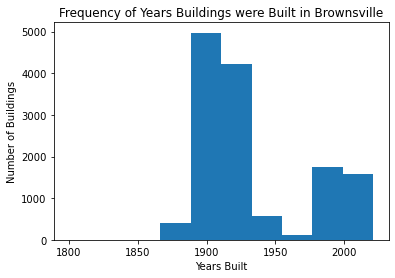

In [72]:
pluto_bk16['yearbuilt'].plot(kind='hist',range=(1800,2021), bins=10)
plt.title("Frequency of Years Buildings were Built in Brownsville")
plt.ylabel("Number of Buildings")
plt.xlabel("Years Built")

--------------------

Number of floors

In [30]:
pluto_bk16["numfloors"].mean()

2.278555166975245

In [31]:
pluto_bk16["numfloors"].median()

2.0

In [32]:
pluto_bk16["numfloors"].mode()

0    2.0
dtype: float64

Text(0.5, 0, 'Number of Floors in Building')

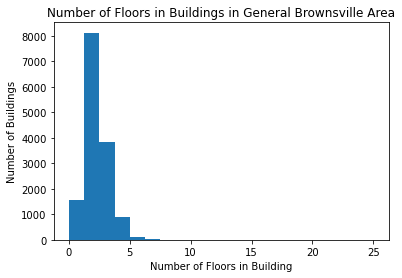

In [82]:
pluto_bk16['numfloors'].plot(kind='hist', bins = 20)
plt.title("Number of Floors in Buildings in General Brownsville Area")
plt.ylabel("Number of Buildings")
plt.xlabel("Number of Floors in Building")

----------------------------

Number of residential units

In [33]:
pluto_bk16["unitsres"].mean()

4.374957141877529

In [34]:
pluto_bk16["unitsres"].median()

2.0

In [35]:
pluto_bk16["unitsres"].mode()

0    2.0
dtype: float64

Text(0.5, 0, 'Number of Residential Units')

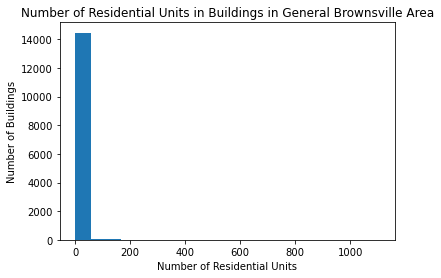

In [78]:
pluto_bk16['unitsres'].plot(kind='hist', bins=20)
plt.title("Number of Residential Units in Buildings in General Brownsville Area")
plt.ylabel("Number of Buildings")
plt.xlabel("Number of Residential Units")

------

So our information for Brownsville buildings is: <br>

Average building area: 2,564 sqr feet<br>

Average year buildings were built: 1925<br>

Average number of floors: 2 floors<br>

Average number of residential units per building:  2 units

-----------------

---------------

# Brownsville Complaints Buildings

In this section we will be using the Brownsville API dataset, because it has both building size and age information, and also complaints information.

In [40]:
#leading the API dataset
brownsville = pd.read_csv("brownsville.txt", parse_dates=["statusdate"])

#setting an option to show all columns, since this dataset has many of them and python truncated it originally.
pd.set_option('display.max_columns', None)


brownsville.head()

,Unnamed: 0,complaintid,buildingid,boroughid,borough,housenumber,streetname,zip,block,lot,apartment,communityboard,receiveddate,status,unittypeid,spacetypeid,typeid,majorcategoryid,minorcategoryid,codeid,statusdate,statusdescription,address,latitude,longitude,bbl,bldgclass,bldgarea,numbldgs,numfloors,unitsres,unitstotal,landuse,ownername,yearbuilt,yearalter1,yearalter2,ownertype,ownertypelong,unittype,spacetype,type,code,majorcategory,minorcategory,statusdescriptionshort
0,0,7419258,314794,3,BROOKLYN,214,HULL STREET,11233,1540,23,3L,16,2015-04-01,CLOSE,92,550,1,59,349,2715,2015-04-06,The Department of Housing Preservation and Dev...,214 HULL STREET,40.679984,-73.907031,3015400023,C1,7600.0,1,4.0,8,8,2.0,"HULL STREET ASSOCIATES , LLC",1910,0,0,NaN,UNKNOWN (USUALLY PRIVATE OWNERSHIP),BUILDING-WIDE,BUILDING-WIDE,EMERGENCY,NO HEAT,HEAT/HOT WATER,ENTIRE BUILDING,Single complaint; tenant confirmed resolved
1,1,7419264,311915,3,BROOKLYN,530,HERZL STREET,11212,3620,38,B6,16,2015-04-01,CLOSE,91,543,1,59,348,2713,2015-04-07,The Department of Housing Preservation and Dev...,530 HERZL STREET,40.656544,-73.912252,3036200038,C1,40000.0,1,4.0,46,46,2.0,530 HERZL,1930,0,0,NaN,UNKNOWN (USUALLY PRIVATE OWNERSHIP),APARTMENT,ENTIRE APARTMENT,EMERGENCY,NO HEAT,HEAT/HOT WATER,APARTMENT ONLY,Inspected; no violations issued
2,2,7419438,873260,3,BROOKLYN,2313,PACIFIC STREET,11233,1435,54,1,16,2015-04-01,CLOSE,91,543,1,56,337,2836,2015-04-14,The Department of Housing Preservation and Dev...,2313 PACIFIC STREET,40.675423,-73.908974,3014350054,B1,2130.0,1,3.0,2,2,1.0,"OSOFISAN, OLATUNDE",2005,0,0,NaN,UNKNOWN (USUALLY PRIVATE OWNERSHIP),APARTMENT,ENTIRE APARTMENT,EMERGENCY,NaN,DOOR/WINDOW,WINDOW FRAME,Inspected; violations issued
3,3,7419438,873260,3,BROOKLYN,2313,PACIFIC STREET,11233,1435,54,1,16,2015-04-01,CLOSE,91,548,3,28,198,1364,2015-04-14,The Department of Housing Preservation and Dev...,2313 PACIFIC STREET,40.675423,-73.908974,3014350054,B1,2130.0,1,3.0,2,2,1.0,"OSOFISAN, OLATUNDE",2005,0,0,NaN,UNKNOWN (USUALLY PRIVATE OWNERSHIP),APARTMENT,OTHER ROOM/AREA,NON EMERGENCY,BULGING/HOLE/CRACKED,PLASTER PAINT/PLASTER,WALLS WALL,Inspected; no violations issued
4,4,7419438,873260,3,BROOKLYN,2313,PACIFIC STREET,11233,1435,54,1,16,2015-04-01,CLOSE,91,547,3,28,198,1364,2015-04-14,The Department of Housing Preservation and Dev...,2313 PACIFIC STREET,40.675423,-73.908974,3014350054,B1,2130.0,1,3.0,2,2,1.0,"OSOFISAN, OLATUNDE",2005,0,0,NaN,UNKNOWN (USUALLY PRIVATE OWNERSHIP),APARTMENT,LIVING ROOM,NON EMERGENCY,BULGING/HOLE/CRACKED,PLASTER PAINT/PLASTER,WALLS WALL,Inspected; violations issued


------------------------

Building Area

In [41]:
brownsville["bldgarea"].mean()

34937.97297456343

In [42]:
brownsville["bldgarea"].median()

5850.0

In [43]:
brownsville["bldgarea"].mode()

0    245538.0
dtype: float64

Text(0.5, 0, 'Building Square Feet')

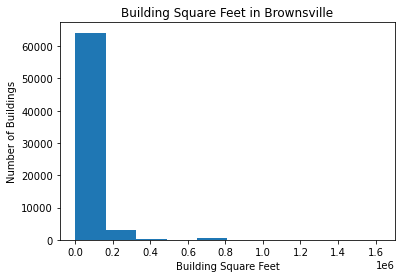

In [74]:
brownsville['bldgarea'].plot(kind='hist')
plt.title("Building Square Feet in Brownsville")
plt.ylabel("Number of Buildings")
plt.xlabel("Building Square Feet")

-------------------

Year built

In [44]:
brownsville["yearbuilt"].mean()

1924.421941052137

In [45]:
brownsville["yearbuilt"].median()

1929.0

In [46]:
brownsville["yearbuilt"].mode()

0    1930
dtype: int64

Text(0.5, 0, 'Years Built')

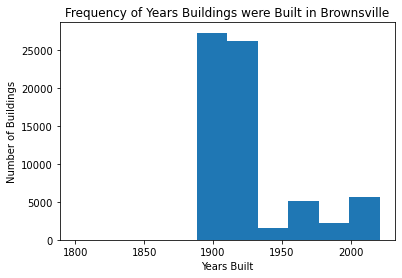

In [73]:
brownsville['yearbuilt'].plot(kind='hist',range=(1800,2021))
plt.title("Frequency of Years Buildings were Built in Brownsville")
plt.ylabel("Number of Buildings")
plt.xlabel("Years Built")

--------------------

Number of floors

In [47]:
brownsville["numfloors"].mean()

3.9534846171911697

In [48]:
brownsville["numfloors"].median()

3.0

In [49]:
brownsville["numfloors"].mode()

0    3.0
dtype: float64

Text(0.5, 0, 'Number of Floors in Building')

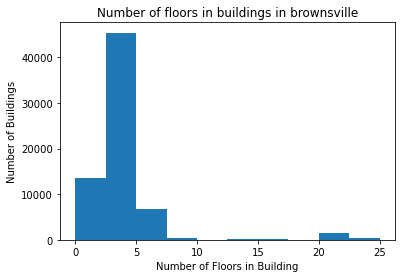

In [75]:
brownsville['numfloors'].plot(kind='hist')
plt.title("Number of Floors in Buildings in Brownsville")
plt.ylabel("Number of Buildings")
plt.xlabel("Number of Floors in Building")

-----------------------

Number of Residential Units

In [50]:
brownsville["unitsres"].mean()

44.50610615312353

In [51]:
brownsville["unitsres"].median()

6.0

In [52]:
brownsville["unitsres"].mode()

0    3
dtype: int64

Text(0.5, 0, 'Number of Residential Units')

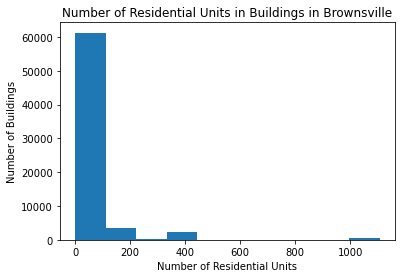

In [76]:
brownsville['unitsres'].plot(kind='hist')
plt.title("Number of Residential Units in Buildings in Brownsville")
plt.ylabel("Number of Buildings")
plt.xlabel("Number of Residential Units")

------------------------

Information for the top buildings in Brownsville with complaints/violations is: <br>

Average building area:  34,937 sqr feet<br>

Average year buildings were built: 1929<br>

Average number of floors:  3 floors<br>

Average number of residential units per building:  6 units

----------------------------

Here, we will check the names of owning companies of buildings that come up most frequently  in the data.

In [57]:
brownsville["ownername"].value_counts().head(10)

PLAZA RESIDENCES, LP                                   2292
HP MARCUS GARVEY PRESERVATION HOUSING CO MPANY, INC    1514
505 ROCKAWAY LLC                                       1472
HOWARD AVENUE ASSOCIATES                                988
LIVONIA HOUSING DEVELOPMENT FUND COMPANY , INC          965
351 RESIDENCE LLC                                       794
MHANY MOTHER GASTON HOUSING DEVELOPMENT  FUND CORPO     686
RIVERDALE RESIDENCE LLC                                 685
PARK MONROE II REHAB HOUSING DEVELOPMENT  FUND CORP     680
PITKIN APARTMENTS LLC                                   637
Name: ownername, dtype: int64

Text(0.5, 0, 'Number of Reports')

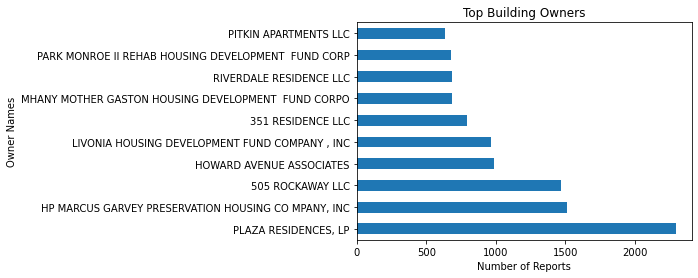

In [83]:
owner_values = brownsville["ownername"].value_counts().head(10)
owner_values.plot(kind = "barh")
plt.title("Top Building Owners")
plt.ylabel("Owner Names")
plt.xlabel("Number of Reports")

The owners that come up most frequently are:<br>
1. Plaza Residences, LP<br>
2. Hp Marcus Garvey Preservation Housing Company, Inc<br>
3. 505 Rockaway LLC<br>
4. Howard Avenue Associates<br>
5. Livonia Housing Development Fund Company, Inc<br>
6. 35 Residence LLC<br>
7. Mhany Mother Gaston Housing Development Fund Corporation<br>
8. Riverdale Residence LLC<br>
9. Park Monroe II Rehad Housing Development Fund Corp.<br>
10. Pitkin Apartments LLC<br>

-----------------------

Here we'll take a look at complaints and their relationship with the building's age.

In [59]:
brownsville["complaints"] = brownsville["code"] + "-" + brownsville["majorcategory"] + "-" + brownsville["minorcategory"]

In [60]:
bv_com = brownsville[["yearbuilt", "complaints"]]
bv_com

,yearbuilt,complaints
0,1910,NO HEAT-HEAT/HOT WATER-ENTIRE BUILDING
1,1930,NO HEAT-HEAT/HOT WATER-APARTMENT ONLY
2,2005,NaN
3,2005,BULGING/HOLE/CRACKED-PLASTER PAINT/PLASTER-WAL...
4,2005,BULGING/HOLE/CRACKED-PLASTER PAINT/PLASTER-WAL...
...,...,...
68123,1968,DIRTY OR UNSANITARY-PLASTER PAINT/PLASTER-WALL...
68124,1968,BROKEN OR DEFECTIVE-FLOORING/STAIRS-FLOOR
68125,1969,NaN
68126,1969,MICE-UNSANITARY CONDITION-PESTS


In [61]:
bv_com.value_counts().head(15)

yearbuilt  complaints                                             
1930       NO HEAT-HEAT/HOT WATER-APARTMENT ONLY                      1600
           NO HEAT-HEAT/HOT WATER-ENTIRE BUILDING                     1388
1910       NO HEAT-HEAT/HOT WATER-ENTIRE BUILDING                     1264
           NO HEAT-HEAT/HOT WATER-APARTMENT ONLY                      1230
1930       MICE-UNSANITARY CONDITION-PESTS                             798
1910       NO HEAT AND NO HOT WATER-HEAT/HOT WATER-ENTIRE BUILDING     703
1930       AT WALL OR CEILING-WATER LEAK-HEAVY FLOW                    568
           NO HEAT AND NO HOT WATER-HEAT/HOT WATER-ENTIRE BUILDING     559
1910       MICE-UNSANITARY CONDITION-PESTS                             554
           AT WALL OR CEILING-WATER LEAK-HEAVY FLOW                    541
1930       ROACHES-UNSANITARY CONDITION-PESTS                          483
           AT WALL OR CEILING-WATER LEAK-SLOW LEAK                     467
           NO HEAT AND NO HOT WAT

Text(0.5, 0, 'Number of Reports')

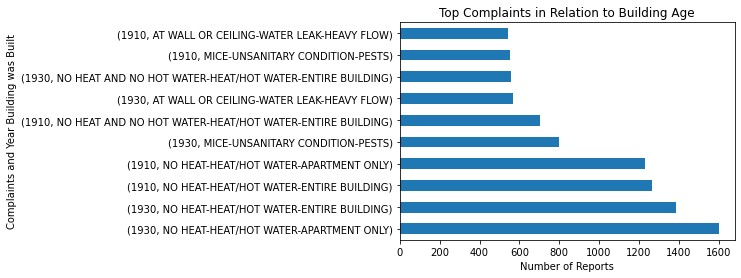

In [84]:
bv_com_values = bv_com.value_counts().head(10)
bv_com_values.plot(kind = "barh")
plt.title("Top Complaints in Relation to Building Age")
plt.ylabel("Complaints and Year Building was Built")
plt.xlabel("Number of Reports")

----------------------------